In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from math import sqrt

from sklearn.svm import LinearSVC, LinearSVR
from sklearn.metrics import accuracy_score, classification_report, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


import statsmodels.api as sm
# import pmdarima as pm

from IPython.display import display

In [2]:
df_1 = pd.read_csv("../data/kappa_distance_2021.csv")
data = df_1.copy(deep=True)

data.drop(columns="Unnamed: 0", inplace=True)

data["timestamp"] = pd.to_datetime(data["timestamp"])

In [3]:
X = data.distance.values.reshape(-1, 1)
y = data.kappa.values

In [4]:
y

array([ 4.74746754, 10.50049625, 11.02460691, 14.8883995 , 17.69787644,
       18.37434486, 18.49013675, 17.85023419, 20.86082336, 14.56540106,
       16.02803548, 19.47741498, 20.80597457, 16.86905027, 18.66077743,
       14.13270505, 11.01241829, 16.6435608 , 14.85183364, 12.38973237,
       19.56273532, 14.13879936, 15.44907602, 13.35263336, 14.12051643,
        6.22838489, 10.65894831, 12.29222341, 14.70557019, 10.01295144,
        2.09644266,  8.58078858, 11.00632398, 12.68225925,  7.94698033,
        5.89319784,  3.73581207,  2.99840055,  4.85716512,  6.70983538,
        6.27713937,  6.63060935,  8.64782599,  3.32139899,  2.6022704 ,
        1.84048164,  1.2737108 ,  2.82775987,  3.67486897,  4.4793179 ,
        5.10093753,  4.07709344,  7.21566312, 13.49280249, 15.30281258,
       15.54049067, 18.2829302 , 28.55184267, 14.84573933, 16.25961926,
       19.54445239, 25.70579987, 18.97158724, 24.20659959, 27.08311394,
       25.34014126, 36.91323608, 42.33107773, 32.58018162, 33.64

In [5]:
stl = sm.tsa.STL(data.kappa, period=12, seasonal=13).fit()

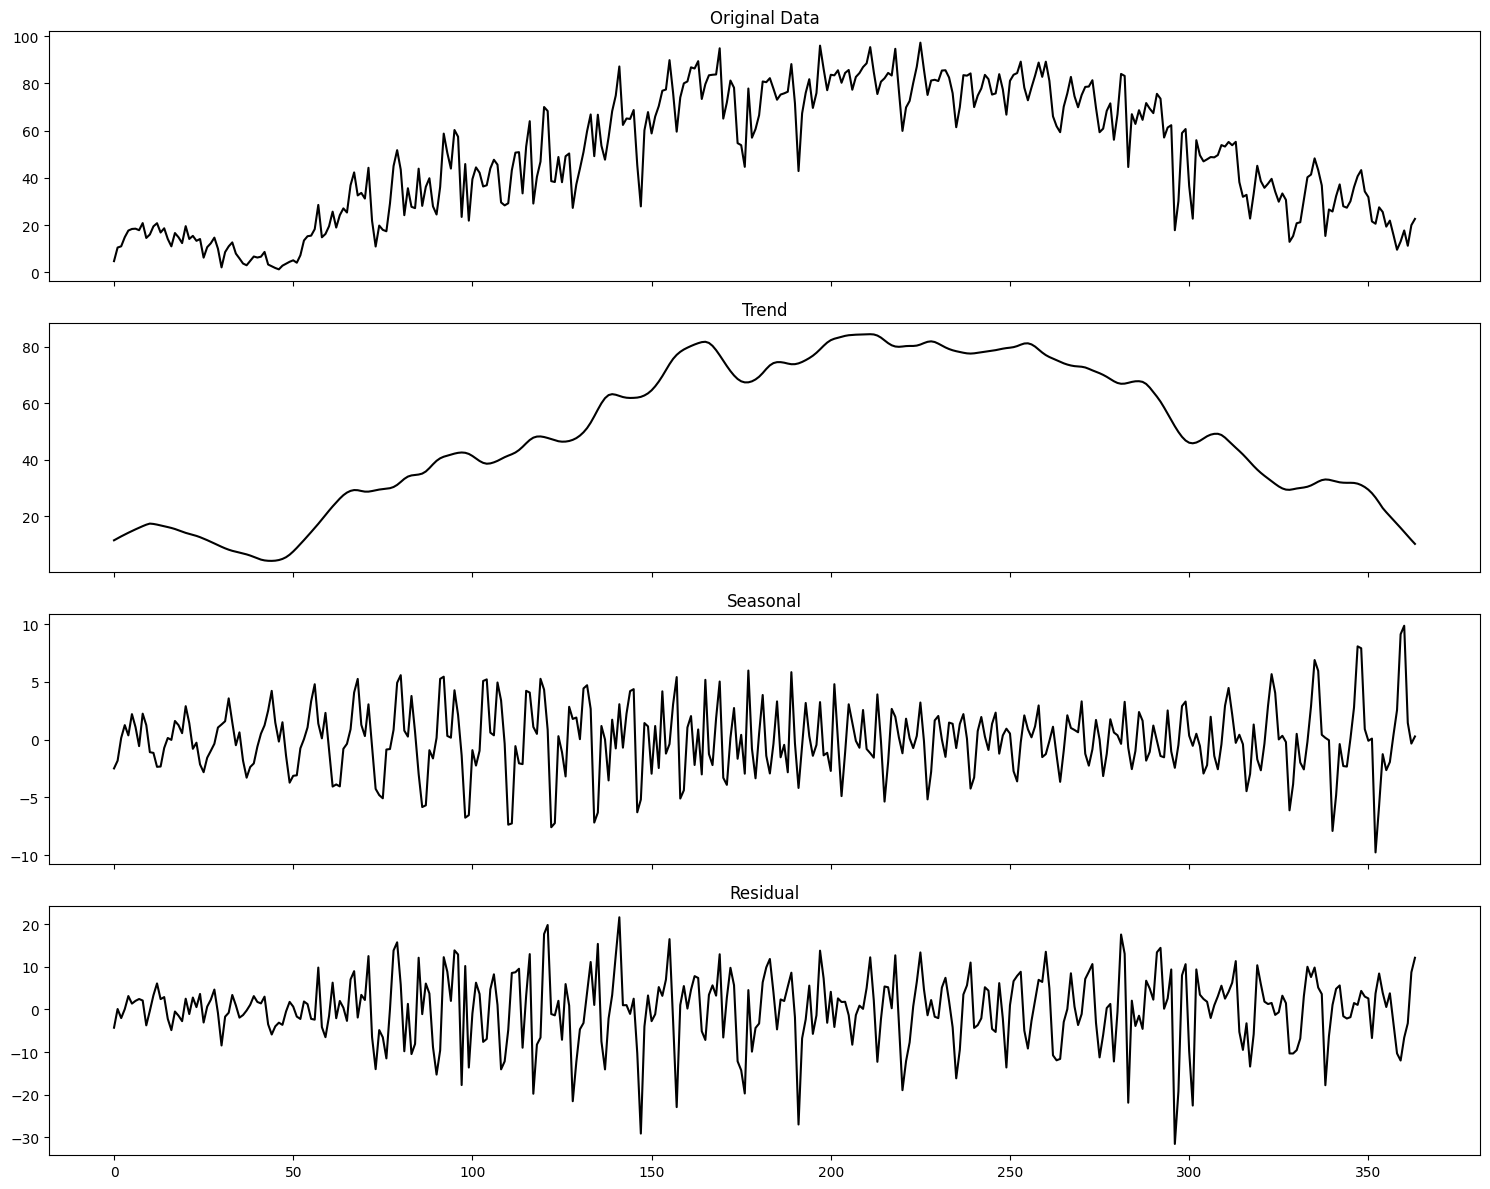

In [6]:
# それぞれの成分を描画
fig, ax = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

data["kappa"].plot(ax=ax[0], c='black')
ax[0].set_title("Original Data")

stl.trend.plot(ax=ax[1], c='black')
ax[1].set_title("Trend")

stl.seasonal.plot(ax=ax[2], c='black')
ax[2].set_title("Seasonal")

stl.resid.plot(ax=ax[3], c='black')
ax[3].set_title("Residual")

plt.tight_layout()

plt.show()

In [8]:
# kappaの時系列データを分割
train, test = train_test_split(y, test_size=0.2, shuffle=False)

In [9]:
test

array([75.59991639, 73.5461339 , 57.09149672, 61.32704221, 62.32041476,
       17.85023419, 30.13636329, 58.98682715, 60.69323397, 36.5597661 ,
       22.73787086, 55.95795504, 49.58330671, 46.99931924, 47.87689989,
       48.82761226, 48.69963175, 49.66862705, 53.89198393, 53.28255292,
       55.22054353, 53.83713514, 55.27539232, 38.23570137, 31.98293924,
       32.81785972, 22.78662534, 33.26883866, 45.13446036, 38.61354859,
       35.80407165, 37.55313864, 39.60082682, 34.21345672, 29.91696812,
       33.40900779, 30.69703981, 12.91993734, 15.3759443 , 20.78769164,
       21.22038766, 30.71532274, 40.27120093, 41.4047426 , 48.27303005,
       43.33663889, 36.81572712, 15.41251016, 26.61994638, 25.76064866,
       32.26937181, 37.24232883, 27.99726045, 27.37564083, 30.12417467,
       36.09050422, 40.68561401, 43.30007303, 34.2622112 , 31.87324166,
       21.56776333, 20.59267372, 27.5401872 , 25.57172505, 19.36162309,
       21.90904469, 15.86348911,  9.58025543, 13.06010648, 17.73

In [13]:
sarima = sm.tsa.statespace.SARIMAX(train, order=(3, 1, 1), seasonal_order=(1, 0, 1, 12))
sarima = sarima.fit()
sarima.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65166D+00    |proj g|=  2.79420D-02

At iterate    5    f=  3.64449D+00    |proj g|=  1.05926D-01


 This problem is unconstrained.



At iterate   10    f=  3.62750D+00    |proj g|=  1.12493D-02

At iterate   15    f=  3.62722D+00    |proj g|=  4.85866D-03

At iterate   20    f=  3.62718D+00    |proj g|=  2.25338D-03

At iterate   25    f=  3.62682D+00    |proj g|=  8.56692D-03

At iterate   30    f=  3.62669D+00    |proj g|=  7.62390D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     34      1     0     0   7.624D-06   3.627D+00
  F =   3.6266891444599794     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  291
Model:             SARIMAX(3, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1055.367
Date:                            Fri, 22 Dec 2023   AIC                           2124.733
Time:                                    03:48:25   BIC                           2150.422
Sample:                                         0   HQIC                          2135.025
                                            - 291                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4126      0.078      5.257      0.000       0.259       0.566
ar.L2         -0.1488      0.058     -2.570      0.010      -0.262      -0.035
ar.L3          0.0353      0.071      0.498      0.618      -0.104       0.174
ma.L1         -0.8244      0.062    -13.370      0.000      -0.945      -0.704
ar.S.L12      -0.5439      0.458     -1.188      0.235      -1.441       0.354
ma.S.L12       0.4619      0.486      0.950      0.342      -0.491       1.415
sigma2        84.5610      6.238     13.556      0.000      72.335      96.787
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                25.91
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.53
Prob(H) (two-sided):                  0.61   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

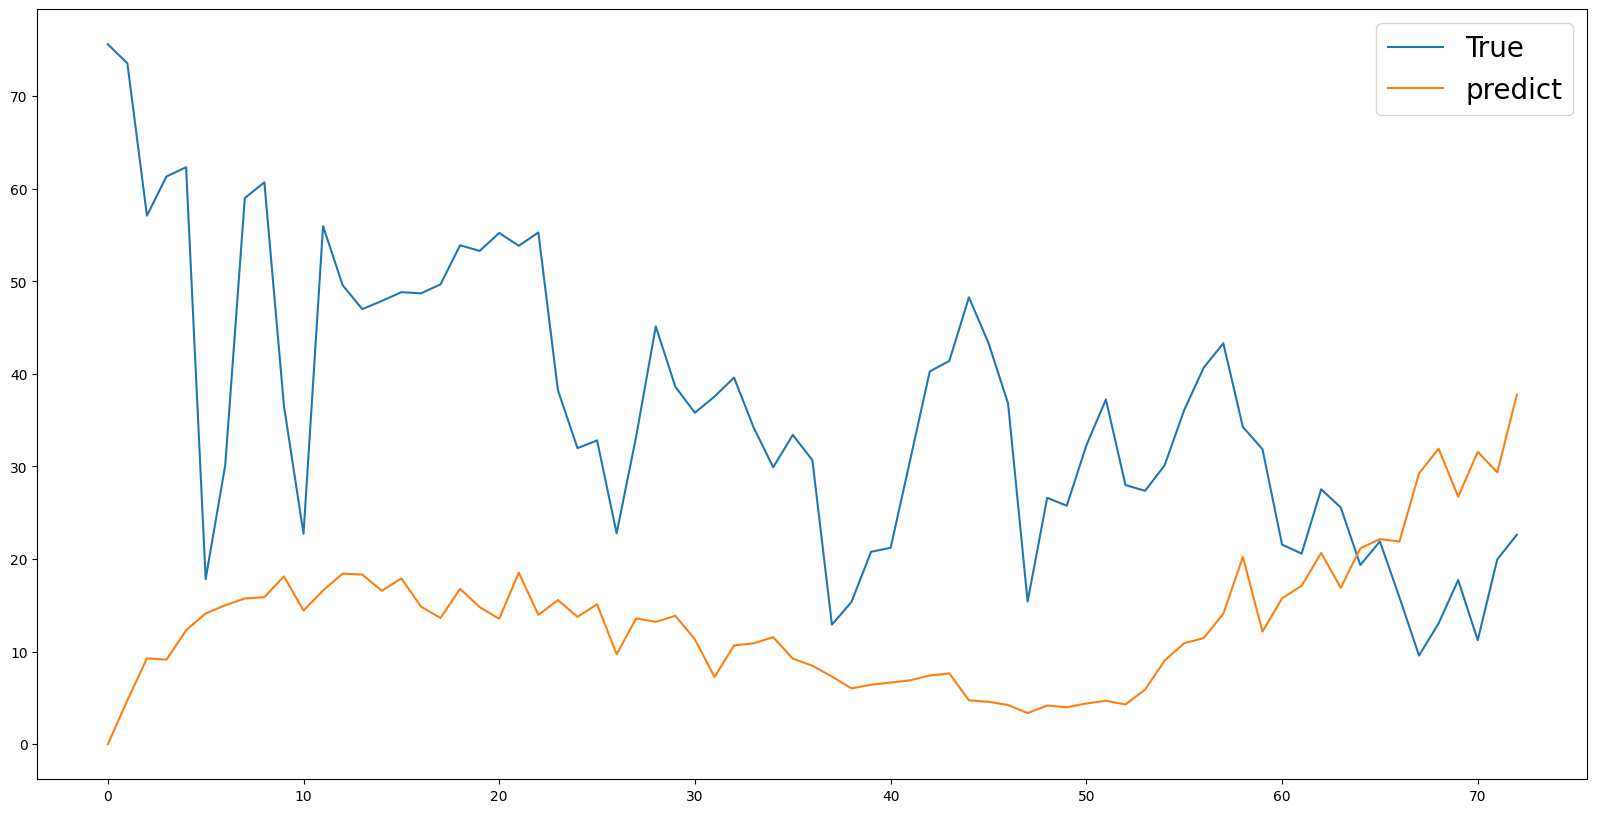

In [14]:
pred = sarima.predict(start=0, end=72)
plt.figure(figsize=(20, 10))
plt.plot(test, label='True')
plt.plot(pred, label='predict')
plt.legend(prop={'size': 20})
plt.show()

In [15]:
test

array([75.59991639, 73.5461339 , 57.09149672, 61.32704221, 62.32041476,
       17.85023419, 30.13636329, 58.98682715, 60.69323397, 36.5597661 ,
       22.73787086, 55.95795504, 49.58330671, 46.99931924, 47.87689989,
       48.82761226, 48.69963175, 49.66862705, 53.89198393, 53.28255292,
       55.22054353, 53.83713514, 55.27539232, 38.23570137, 31.98293924,
       32.81785972, 22.78662534, 33.26883866, 45.13446036, 38.61354859,
       35.80407165, 37.55313864, 39.60082682, 34.21345672, 29.91696812,
       33.40900779, 30.69703981, 12.91993734, 15.3759443 , 20.78769164,
       21.22038766, 30.71532274, 40.27120093, 41.4047426 , 48.27303005,
       43.33663889, 36.81572712, 15.41251016, 26.61994638, 25.76064866,
       32.26937181, 37.24232883, 27.99726045, 27.37564083, 30.12417467,
       36.09050422, 40.68561401, 43.30007303, 34.2622112 , 31.87324166,
       21.56776333, 20.59267372, 27.5401872 , 25.57172505, 19.36162309,
       21.90904469, 15.86348911,  9.58025543, 13.06010648, 17.73